<a href="https://colab.research.google.com/github/DannaArciniega22/Actividad-3-Valores-Atipicos-/blob/main/Actividad_3_(Valores_At%C3%ADpicos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDAD 3 | VALORES NULOS
*   Danna Paola Arciniega Zúñiga | A01731987

In [1]:
#IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#MOSTRAR TODO EL DATA FRAME → FILAS
pd.options.display.max_rows = None

In [ ]:
#CARGAR ARCHIVOS
from google.colab import files
files.upload()

In [4]:
#CARGA DESDE UN ARCHIVO .csv SIN INDICE
df = pd.read_csv('Limpieza_Ventas_totales.csv')
df.head()

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


In [ ]:
#IDENTIFICAR VALORES NULOS
valores_nulos=df.isnull().sum()
valores_nulos

In [6]:
#COLUMNA: indumentaria_calzado_textiles_hogar
#SUSTITUIR VALOES NULOS POR VALORES NO NULOS HACIA ATRAS "BACKWARD FILL ("bfill")"
#FILTRO POR COLUMNAS
df["indumentaria_calzado_textiles_hogar"]=df["indumentaria_calzado_textiles_hogar"].fillna(method="bfill")

In [ ]:
#IDENTIFICAR VALORES NULOS
valores_nulos=df.isnull().sum()
valores_nulos

In [9]:
#REALIZAR UNA COPIA DEL DATAFRAME
df1=df.copy()

**COLUMNA: salon_ventas**

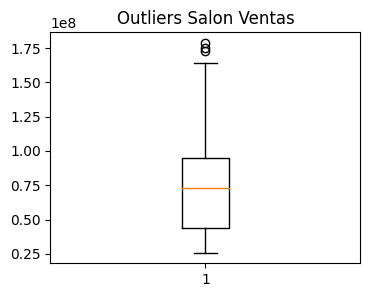

In [18]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["salon_ventas"])
plt.title('Outliers Salon Ventas')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS

In [30]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["salon_ventas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_1 =percentile75 + 1.5*iqr
Limite_Inferior_1 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_1)
print("Limite inferioir permitido",Limite_Inferior_1)

Limite superioir permitido 170440082.58499998
Limite inferioir permitido -32001350.254999995


In [31]:
#ENCONTRAR OUTLIERS
outliers_iqr =df1[(y>Limite_Superior_1)|(y<Limite_Inferior_1)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,3215054.70,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [32]:
#OBTENER DATOS LIMPIOS
data_clean_salon_ventas=df1[(y<=Limite_Superior_1)&(y>=Limite_Inferior_1)]
#Nota: los outliers los elimina

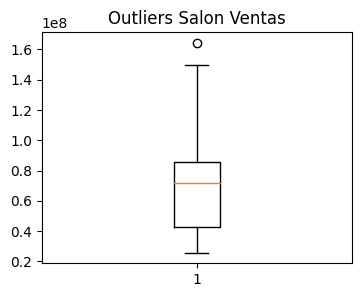

In [33]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_salon_ventas["salon_ventas"])
plt.title('Outliers Salon Ventas')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: APARECE UNO NUEVO PORQUE SE RECALCULAN LOS LIMITES
#NOTA: SOLO SE HACE UNA VEZ ESTE METODO

**COLUMNA: Tarjeta Debito**

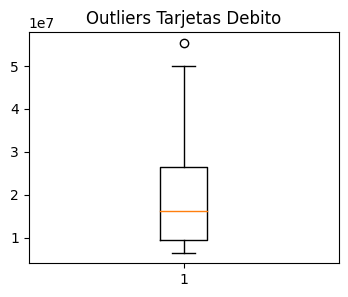

In [34]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["tarjetas_debito"])
plt.title('Outliers Tarjetas Debito')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS

In [84]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["tarjetas_debito"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_2 =percentile75 + 1.5*iqr
Limite_Inferior_2 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_2)
print("Limite inferioir permitido",Limite_Inferior_2)


#ENCONTRAR OUTLIERS
outliers_2 =df1[(y>Limite_Superior_2)|(y<Limite_Inferior_2)]
outliers_2


#OBTENER DATOS LIMPIOS
data_clean_tarjetas_debito=df1[(y<=Limite_Superior_2)&(y>=Limite_Inferior_2)]
#Nota: los outliers los elimina

Limite superioir permitido 51933510.0585
Limite inferioir permitido -15937937.1375


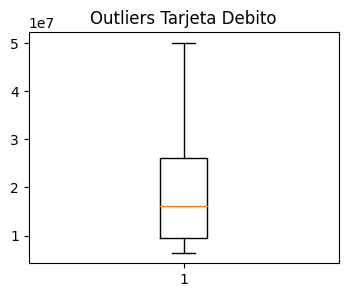

In [49]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_tarjetas_debito["tarjetas_debito"])
plt.title('Outliers Tarjeta Debito')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: Se eliminan

**COLUMNA:Tarjetas Credito**

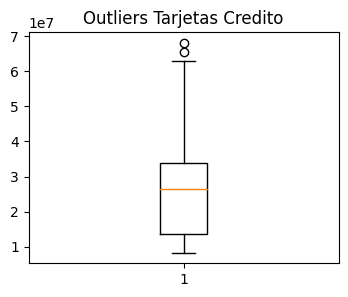

In [56]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["tarjetas_credito"])
plt.title('Outliers Tarjetas Credito')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS

In [85]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["tarjetas_credito"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_3 =percentile75 + 1.5*iqr
Limite_Inferior_3 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_3)
print("Limite inferioir permitido",Limite_Inferior_3)


#ENCONTRAR OUTLIERS
outliers_3 =df1[(y>Limite_Superior_3)|(y<Limite_Inferior_3)]
outliers_3


#OBTENER DATOS LIMPIOS
data_clean_tarjetas_credito=df1[(y<=Limite_Superior_3)&(y>=Limite_Inferior_3)]
#Nota: los outliers los elimina

Limite superioir permitido 63856184.05500001
Limite inferioir permitido -16515482.225


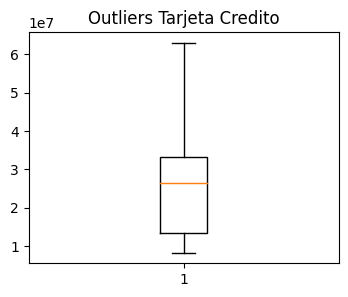

In [57]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_tarjetas_credito["tarjetas_credito"])
plt.title('Outliers Tarjeta Credito')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: Se eliminan

**COLUMNA: BEBIDAS**

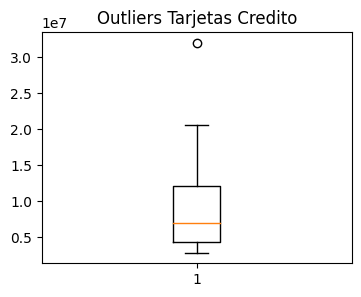

In [58]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["bebidas"])
plt.title('Outliers Bebidas')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS

In [86]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["bebidas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_4 =percentile75 + 1.5*iqr
Limite_Inferior_4 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_4)
print("Limite inferioir permitido",Limite_Inferior_4)


#ENCONTRAR OUTLIERS
outliers_4 =df1[(y>Limite_Superior_4)|(y<Limite_Inferior_4)]
outliers_4


#OBTENER DATOS LIMPIOS
data_clean_bebidas=df1[(y<=Limite_Superior_4)&(y>=Limite_Inferior_4)]
#Nota: los outliers los elimina

Limite superioir permitido 23788205.776499998
Limite inferioir permitido -7302449.5474999985


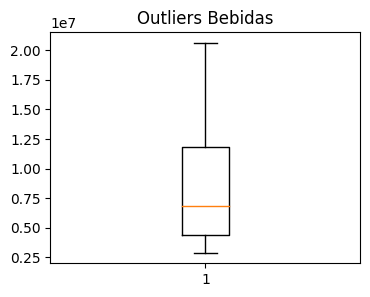

In [62]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_bebidas["bebidas"])
plt.title('Outliers Bebidas')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: Se eliminan

**COLUMNA: PANADERIA**

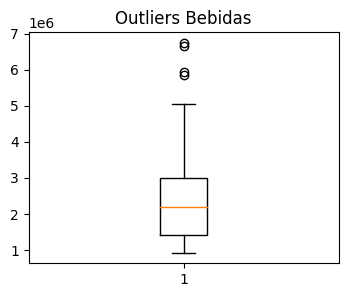

In [64]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["panaderia"])
plt.title('Outliers Panaderia')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS

In [67]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["panaderia"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_5 =percentile75 + 1.5*iqr
Limite_Inferior_5 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_5)
print("Limite inferioir permitido",Limite_Inferior_5)


#ENCONTRAR OUTLIERS
outliers_5 =df1[(y>Limite_Superior_5)|(y<Limite_Inferior_5)]
outliers_5


#OBTENER DATOS LIMPIOS
data_clean_panaderia=df1[(y<=Limite_Superior_5)&(y>=Limite_Inferior_5)]
#Nota: los outliers los elimina

Limite superioir permitido 5344003.4675
Limite inferioir permitido -946571.9125000001


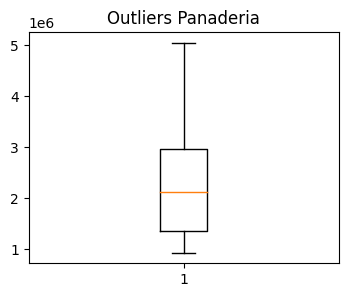

In [68]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_panaderia["panaderia"])
plt.title('Outliers Panaderia')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: Se eliminan

**COLUMNA: LACTEOS**

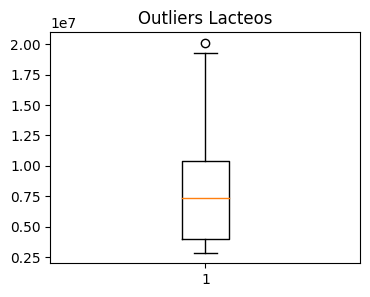

In [70]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["lacteos"])
plt.title('Outliers Lacteos')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS

In [72]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["lacteos"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_6 =percentile75 + 1.5*iqr
Limite_Inferior_6 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_6)
print("Limite inferioir permitido",Limite_Inferior_6)


#ENCONTRAR OUTLIERS
outliers_6 =df1[(y>Limite_Superior_6)|(y<Limite_Inferior_6)]
outliers_6


#OBTENER DATOS LIMPIOS
data_clean_lacteos=df1[(y<=Limite_Superior_6)&(y>=Limite_Inferior_6)]
#Nota: los outliers los elimina

Limite superioir permitido 19940661.0455
Limite inferioir permitido -5569362.3025


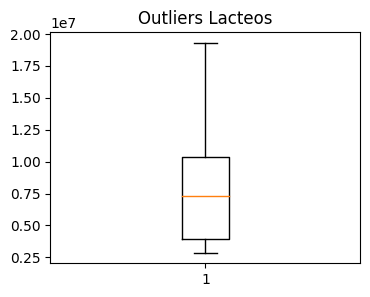

In [73]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_lacteos["lacteos"])
plt.title('Outliers Lacteos')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: Se eliminan

**COLUMNA: ALIMENTOS PREPARADOS ROSTISERIA**

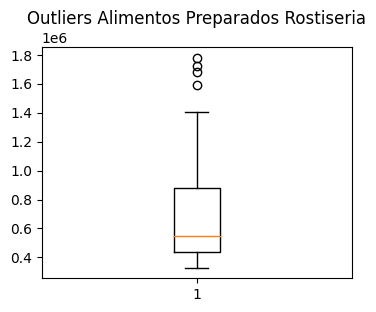

In [77]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["alimentos_preparados_rotiseria"])
plt.title('Outliers Alimentos Preparados Rostiseria')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS

In [78]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["alimentos_preparados_rotiseria"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_7 =percentile75 + 1.5*iqr
Limite_Inferior_7 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_7)
print("Limite inferioir permitido",Limite_Inferior_7)


#ENCONTRAR OUTLIERS
outliers_7 =df1[(y>Limite_Superior_7)|(y<Limite_Inferior_7)]
outliers_7


#OBTENER DATOS LIMPIOS
data_clean_alimentos_preparados_rotiseria=df1[(y<=Limite_Superior_7)&(y>=Limite_Inferior_7)]
#Nota: los outliers los elimina

Limite superioir permitido 1546751.13875
Limite inferioir permitido -227313.79444999993


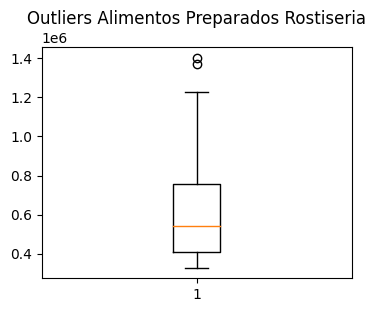

In [80]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_alimentos_preparados_rotiseria["alimentos_preparados_rotiseria"])
plt.title('Outliers Alimentos Preparados Rostiseria')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: APARECEN DOS NUEVOS PORQUE SE RECALCULAN LOS LIMITES
#NOTA: SOLO SE HACE UNA VEZ ESTE METODO

**COLUMNA: Indumentaria Calzado Textiles Hogar**

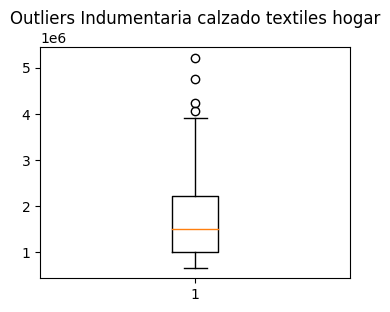

In [83]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["indumentaria_calzado_textiles_hogar"])
plt.title('Outliers Indumentaria calzado textiles hogar')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS

In [87]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["indumentaria_calzado_textiles_hogar"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_8 =percentile75 + 1.5*iqr
Limite_Inferior_8 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_8)
print("Limite inferioir permitido",Limite_Inferior_8)


#ENCONTRAR OUTLIERS
outliers_8 =df1[(y>Limite_Superior_8)|(y<Limite_Inferior_8)]
outliers_8


#OBTENER DATOS LIMPIOS
data_clean_indumentaria_calzado_textiles_hogar=df1[(y<=Limite_Superior_8)&(y>=Limite_Inferior_8)]
#Nota: los outliers los elimina

Limite superioir permitido 4028365.028
Limite inferioir permitido -800338.516


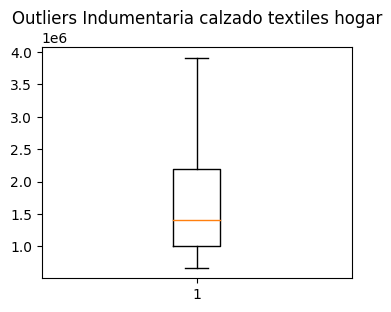

In [88]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_indumentaria_calzado_textiles_hogar["indumentaria_calzado_textiles_hogar"])
plt.title('Outliers Indumentaria calzado textiles hogar')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: Se eliminan

**COLUMNA: ELECTONICOS ARTICULOS HOGAR**

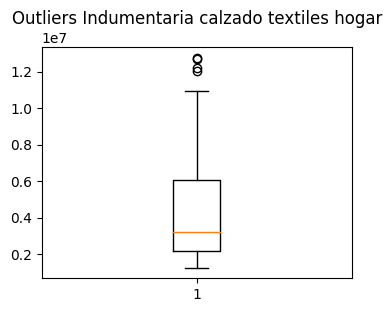

In [90]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["electronicos_articulos_hogar"])
plt.title('Outliers Electronicos Articulos Hogar')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS

In [94]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["electronicos_articulos_hogar"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_9 =percentile75 + 1.5*iqr
Limite_Inferior_9 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_9)
print("Limite inferioir permitido",Limite_Inferior_9)


#ENCONTRAR OUTLIERS
outliers_9 =df1[(y>Limite_Superior_9)|(y<Limite_Inferior_9)]
outliers_9


#OBTENER DATOS LIMPIOS
data_clean_electronicos_articulos_hogar=df1[(y<=Limite_Superior_9)&(y>=Limite_Inferior_9)]
#Nota: los outliers los elimina

Limite superioir permitido 11851594.895499999
Limite inferioir permitido -3640353.060499999


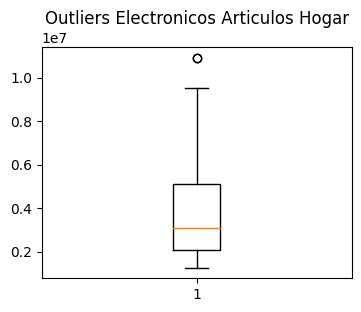

In [97]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_electronicos_articulos_hogar["electronicos_articulos_hogar"])
plt.title('Outliers Electronicos Articulos Hogar')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: APARECE UNO NUEVO PORQUE SE RECALCULAN LOS LIMITES
#NOTA: SOLO SE HACE UNA VEZ ESTE METODO

**COLUMNA: OTROS**

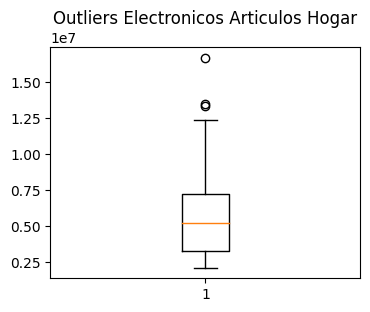

In [98]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=df1["otros"])
plt.title('Outliers OTROS')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: SE IDENTIFICAN OUTLIERS, SE PUEDE OBSERVAR QUE HAY ALGUNOS JUNTOS Y UNO MUY ALEJADO

In [117]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=df1["otros"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_10 =percentile75 + 1.5*iqr
Limite_Inferior_10 =percentile25 - 1.5*iqr

print("Limite superioir permitido",Limite_Superior_10)
print("Limite inferioir permitido",Limite_Inferior_10)


#ENCONTRAR OUTLIERS
outliers_10 =df1[(y>Limite_Superior_10)|(y<Limite_Inferior_10)]
outliers_10


#OBTENER DATOS LIMPIOS
data_clean_otros=df1[(y<=Limite_Superior_10)&(y>=Limite_Inferior_10)]
#Nota: los outliers los elimina

Limite superioir permitido 13169100.024999999
Limite inferioir permitido -2599893.999


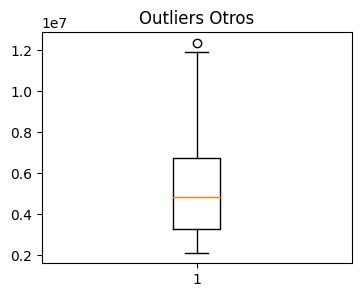

In [118]:
#HISTOGRAMA DE CAJA O BIGOTE
fig = plt.figure(figsize=(4,3))
plt.boxplot(x=data_clean_otros["otros"])
plt.title('Outliers Otros')

#DIBUJAR EL DIAGRAMA
plt.show()

#RESULTADO: APARECE UNO NUEVO PORQUE SE RECALCULAN LOS LIMITES
#NOTA: SOLO SE HACE UNA VEZ ESTE METODO

COMPROBACION QUE ES UN NUEVO OUTLIERS

In [119]:
#ENCONTRAR OUTLIERS | ANTERIOR
outliers_10 =df1[(y>Limite_Superior_10)|(y<Limite_Inferior_10)]
outliers_10

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,1.266927e+07,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4819479.554,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,1.218755e+07,13433071.98
61,61,01/02/2022,152202.6,23802.1,152202573.4,148406529.3,3796044.076,152202573.4,46290956.21,45283575.25,...,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,3912852.426,9.189746e+06,13301387.17


In [115]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=data_clean_otros["otros"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_11 =percentile75 + 1.5*iqr
Limite_Inferior_11 =percentile25 - 1.5*iqr


#ENCONTRAR OUTLIERS | NUEVO
outliers_11 =data_clean_otros[(y>Limite_Superior_11)|(y<Limite_Inferior_11)]
outliers_11


#OBSERVACION: SE PUEDE VER QUE ES UNO TOTALMENTE DIFERENTE Y ESTO ES PORQUE LOS LIMITES SE RECALCULAN Y HACE QUE APAREZCAN NUEVOS.

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


**CONVERTIR Y DESCARGAR DATAFRAME A CSV**

In [122]:
#CONVERTIR ARCHIVO FILTRADO A CSV | FILTRO1
data_clean_salon_ventas.to_csv("ACT_3|COLUMNA_SALON_VENTAS.csv")
data_clean_tarjetas_debito.to_csv("ACT_3|COLUMNA_TARJETAS_DEBITO.csv")
data_clean_tarjetas_credito.to_csv("ACT_3|COLUMNA_TARJETAS_CREDITO.csv")
data_clean_bebidas.to_csv("ACT_3|COLUMNA_BEBIDAS.csv")
data_clean_panaderia.to_csv("ACT_3|COLUMNA_PANADERIA.csv")
data_clean_lacteos.to_csv("ACT_3|COLUMNA_LACTEOS.csv")
data_clean_alimentos_preparados_rotiseria.to_csv("ACT_3|COLUMNA_ALIMENTOS_PREPARADOS_ROSTISERIA.csv")
data_clean_indumentaria_calzado_textiles_hogar.to_csv("ACT_3|COLUMNA_INDUMENTRAIA_CALZADO_TEXTILES_HOGAR.csv")
data_clean_electronicos_articulos_hogar.to_csv("ACT_3|COLUMNA_ELECTRONICOS_ARTICULOS_HOGAR.csv")
data_clean_otros.to_csv("ACT_3|COLUMNA_OTROS.csv")

In [123]:
#DESCARGAR ARCHIVOS FILTRADO A CSV
from google.colab import files

files.download("ACT_3|COLUMNA_SALON_VENTAS.csv")
files.download("ACT_3|COLUMNA_TARJETAS_DEBITO.csv")
files.download("ACT_3|COLUMNA_TARJETAS_CREDITO.csv")
files.download("ACT_3|COLUMNA_BEBIDAS.csv")
files.download("ACT_3|COLUMNA_PANADERIA.csv")
files.download("ACT_3|COLUMNA_LACTEOS.csv")
files.download("ACT_3|COLUMNA_ALIMENTOS_PREPARADOS_ROSTISERIA.csv")
files.download("ACT_3|COLUMNA_INDUMENTRAIA_CALZADO_TEXTILES_HOGAR.csv")
files.download("ACT_3|COLUMNA_ELECTRONICOS_ARTICULOS_HOGAR.csv")
files.download("ACT_3|COLUMNA_OTROS.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>